In [20]:
# first compile the c modules where the model depends on
from  explain_core.ModulesCompiler import compile_modules;
compile_modules()

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine
from explain_core.helpers.Interface import Interface

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("normal_neonate.json")

# get a reference to all the submodels
models = model.models

# instantiate an interface object to interact with the model engine instance
neo = Interface(model)

# enable or disable the physiological submodels
neo.ans(False)
neo.breathing(False)
neo.metabolism(False)
neo.mob(True)

# desiable the extra-corporeal models
neo.placenta(False)
neo.ventilator(False)
neo.ecls(False)
neo.artificial_whomb(False)

# atria
models["LA"].u_vol =  0.0
models["RA"].u_vol =  0.0
models["LA"].el_min = 1300       # 650 
models["RA"].el_min = 1300       # 650
models["LA"].el_max = 5345      # 1500
models["RA"].el_max = 5345      # 1500

# ventricles
models["LV"].u_vol = 0.0
models["RV"].u_vol = 0.0
models["LV"].el_min = 850       # 500
models["RV"].el_min = 850       # 500
models["LV"].el_max = 29195    # 14500
models["RV"].el_max = 29195     # 14500

# stabilize by calculating 60 seconds with fixed resp_rate of 40/min, tidal volume of 16 ml and fixed heart rate of 140 / min
neo.calculate(60)
neo.analyze(["LA.vol", "LV.vol","LA.pres_in", "LV.pres_in","LA.pres","LV.pres"], time_to_calculate=60, weight_based=True)
# neo.analyze_heart()
# neo.plot_time_graph(["LA_LV.flow","RA_RV.flow"], combined=False, sharey=False, time_to_calculate=2, fill=False, sampleinterval=0.0005)
# LA.vol          : max    2.55126, min    1.42837 ml/kg
# LV.vol          : max    4.01551, min    2.28378 ml/kg

# target data
# LA 1.4 - 0.77
# LV 2.51 - 0.78

 Model 'normal neonate' loaded and initialized correctly.
 Ready in 2.4 sec. Average model step in 0.0199 ms.

LA.vol          : max    1.66063, min    0.45573 ml/kg
LV.vol          : max    2.55387, min    0.77427 ml/kg
LA.pres_in      : max   10.63886 min    2.79921
LV.pres_in      : max   77.61715 min    2.31465
LA.pres         : max    7.60271, min   -0.19511 mmHg
LV.pres         : max   74.45674, min   -0.83682 mmHg


{'LA.vol.max': 1.66063,
 'LA.vol.min': 0.45573,
 'LV.vol.max': 2.55387,
 'LV.vol.min': 0.77427,
 'LA.pres.max': 7.60271,
 'LA.pres.min': -0.19511,
 'LV.pres.max': 74.45674,
 'LV.pres.min': -0.83682}

In [21]:
neo.analyze_heart()


LA_LV.flow      : net  249.14554, forward  249.14554, backward        0.0 ml/kg/min, stroke volume:     1.7796 ml/kg, 
RA_RV.flow      : net  249.14553, forward  249.14553, backward        0.0 ml/kg/min, stroke volume:     1.7796 ml/kg, 
RV_PA.flow      : net  249.13342, forward  249.13342, backward        0.0 ml/kg/min, stroke volume:    1.77951 ml/kg, 
LV_AA.flow      : net  249.13143, forward  249.13143, backward        0.0 ml/kg/min, stroke volume:     1.7795 ml/kg, 
IVCI_RA.flow    : net  137.89455, forward   143.0782, backward   -5.18365 ml/kg/min, stroke volume:    0.98495 ml/kg, 
SVC_RA.flow     : net  108.34592, forward  112.88845, backward   -4.54253 ml/kg/min, stroke volume:    0.77389 ml/kg, 
LA.pres_in      : max   10.63885 min    2.78248
RA.pres_in      : max    9.61829 min     2.7992
LV.pres_in      : max   77.61709 min    2.28121
RV.pres_in      : max   45.28738 min     1.4356
AA.pres_in      : max   77.24126 min   52.49593
IVCI.pres_in    : max    7.00548 min    6.667

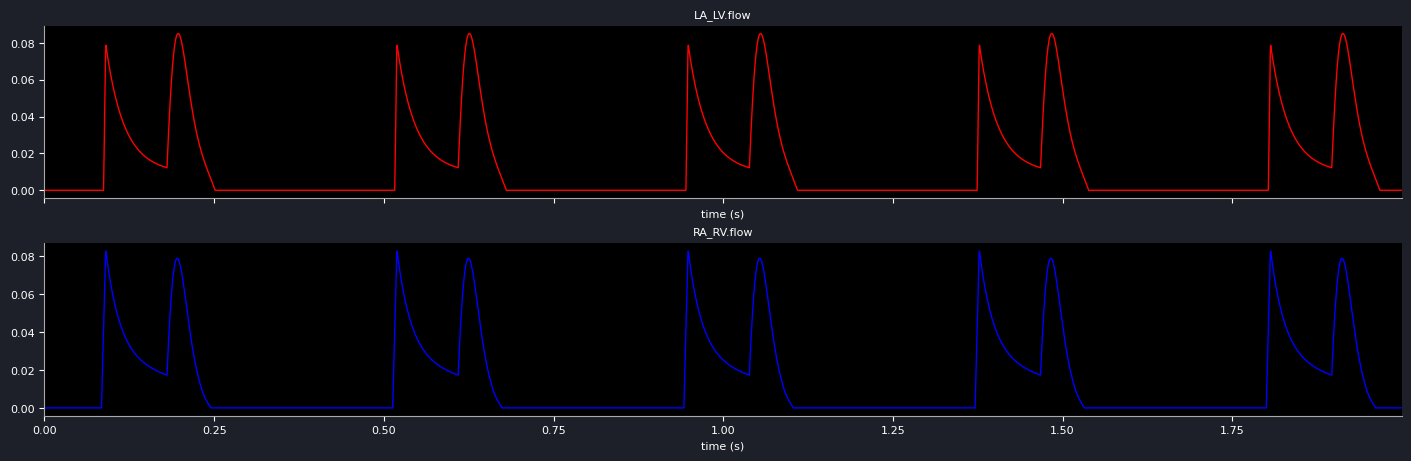


LA_LV.flow      : net  881.12012, forward  881.12012, backward        0.0 ml/min, stroke volume:    5.87267 ml, 
RA_RV.flow      : net   881.1201, forward   881.1201, backward        0.0 ml/min, stroke volume:    5.87267 ml, 


In [22]:
neo.plot_time_graph(["LA_LV.flow","RA_RV.flow"], combined=False, sharey=False, time_to_calculate=2, fill=False, sampleinterval=0.0005)

In [23]:
neo.fastforward(120)
neo.get_total_blood_volume()
#79.94964432178787

 Ready in 4.5 sec. Average model step in 0.0186 ms.
Total blood volume: 79.94964432178709 ml/kg = 100.0%
Systemic blood volume: 71.34488464950645 ml/kg = 89.23727585622822%
Pulmonary total blood volume: 8.604759672280643 ml/kg = 10.76272414377178%
Pulmonary capillary blood volume: 3.851705819453925 ml/kg = 44.762503151154846% of total pulmonary blood volume
Heart blood volume: 5.398498674332412 ml/kg = 6.752373597316014%
Capillary blood volume: 4.415810149753306 ml/kg = 5.523239267932495%
Venous blood volume: 50.95585354122735 ml/kg = 63.734934624770254%
Arterial blood volume: 10.574722284193372 ml/kg = 13.226728366209445%
Upper body blood volume: 21.29327718979045 ml/kg = 26.633360749033148%
Lower body blood volume: 44.65310878538359 ml/kg = 55.85154150987906%


0.2638338262618974

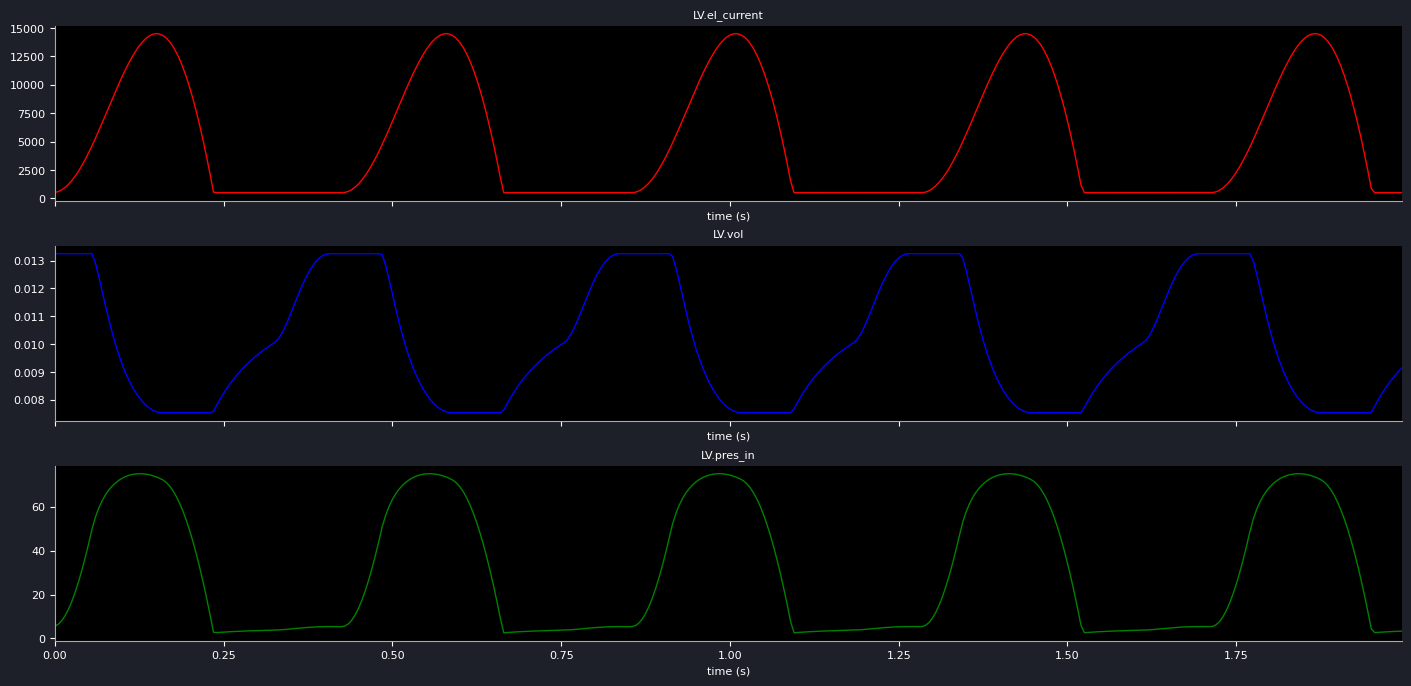


LV.el_current   : max 14505.31208 min      500.0
LV.vol          : max   13.25116, min    7.53646 ml
LV.pres_in      : max   75.08409 min     2.5552


In [6]:
neo.plot_time_graph(["LV.el_current", "LV.vol","LV.pres_in"], time_to_calculate=2, combined=False, sharey=False, fill=False)

Target data (Functional cardiac MRI in preterm and term newborns. Arch Dis Child Fetal Neonatal Ed 2011;96:F86–F91. doi:10.1136/adc.2010.189142. Groves et al.)

LV EDV  2.51    ml/kg 
LV ESV  0.78    ml/kg 
SV      1.73    ml/kg  
HF      140     bpm 
LVO     222-245 ml/kg/min
RVO     219     ml/kg/min
SVC     95      ml/kg/min
DAo     126     ml/kg/min

Target data (Left atrial volume assessed by transthoracic three dimensional echocardiography and magnetic resonance imaging: dynamic changes during the heart cycle in children. Heart 2000;83:537–542. Poutanen et al.)

LA ESV  22.1    ml/bsa = 1.4 ml/kg       (bsa 0.214, weight 3.3 kg, length 50 cm)
LA EDV  11.9    ml/bsa = 0.77 ml/kg      (bsa 0.214, weight 3.3 kg, length 50 cm)